<a href="https://colab.research.google.com/github/thiago-oliva/proyecto-final-salud-mental/blob/main/Salud_Mental_IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/Mental Health Dataset.csv")
df.head()
num_instancias, num_caracteristicas = df.shape
print("Número de instancias:", num_instancias)
print("Número de características:", num_caracteristicas)
df.head()

Número de instancias: 292364
Número de características: 17


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
#renombramos las columnas
df = df.rename(columns={'Gender': 'Género',
                        'Occupation': 'Ocupación',
                        'self_employed': 'Autónomo',
                        'family_history': 'Historial_Familiar',
                        'treatment': 'Tratamiento',
                        'Days_Indoors': 'Dias_sin_salir',
                        'Growing_Stress': 'Estrés_creciente',
                        'Changes_Habits': 'Cambios_de_hábitos',
                        'Mental_Health_History': 'Historia_de_salud_mental',
                        'Mood_Swings': 'Cambios_de_humor',
                        'Coping_Struggles': 'Luchas_de_afrontamiento',
                        'Work_Interest': 'Interés_laboral',
                        'Social_Weakness': 'Aislamiento_social',
                        'mental_health_interview': 'Entrevista_de_salud_mental'})

In [ ]:
df['Country'].value_counts()

Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

In [ ]:
df.dropna(inplace=True) #explicar por que

In [ ]:
df.isna().mean()

Timestamp                     0.0
Género                        0.0
Country                       0.0
Ocupación                     0.0
Autónomo                      0.0
Historial_Familiar            0.0
Tratamiento                   0.0
Dias_sin_salir                0.0
Estrés_creciente              0.0
Cambios_de_hábitos            0.0
Historia_de_salud_mental      0.0
Cambios_de_humor              0.0
Luchas_de_afrontamiento       0.0
Interés_laboral               0.0
Aislamiento_social            0.0
Entrevista_de_salud_mental    0.0
care_options                  0.0
dtype: float64

In [ ]:
df.drop(columns=["Timestamp"], inplace = True)

In [ ]:
df.drop(columns=["care_options"], inplace = True) #puede ser un leak

In [ ]:
df

,Género,Country,Ocupación,Autónomo,Historial_Familiar,Tratamiento,Dias_sin_salir,Estrés_creciente,Cambios_de_hábitos,Historia_de_salud_mental,Cambios_de_humor,Luchas_de_afrontamiento,Interés_laboral,Aislamiento_social,Entrevista_de_salud_mental
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No


In [ ]:
df["Country"].unique()

array(['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom',
       'South Africa', 'Sweden', 'New Zealand', 'Netherlands', 'India',
       'Belgium', 'Ireland', 'France', 'Portugal', 'Brazil', 'Costa Rica',
       'Russia', 'Germany', 'Switzerland', 'Finland', 'Israel', 'Italy',
       'Bosnia and Herzegovina', 'Singapore', 'Nigeria', 'Croatia',
       'Thailand', 'Denmark', 'Mexico', 'Greece', 'Moldova', 'Colombia',
       'Georgia', 'Czech Republic', 'Philippines'], dtype=object)

In [ ]:
print(f'Amount of duplicates: {df.duplicated().sum()}')

print(f'Percentage of duplicates: {(df.duplicated().mean() * 100).round(1)}')

Amount of duplicates: 224148
Percentage of duplicates: 78.1


In [ ]:
df["Country"].value_counts()

Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

In [ ]:
df = df[df['Country'] == 'United States']
df["Country"].unique() #Nos quedamos solo con los de estados unidos ya que son casi la mitad de los datos

array(['United States'], dtype=object)

In [ ]:
df.drop(columns=["Country"], inplace = True)

<ipython-input-15-f9ff7f2e1a9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Country"], inplace = True)


In [ ]:
print(f'Amount of duplicates: {df.duplicated().sum()}')

Amount of duplicates: 156767


In [ ]:
for column in df.columns: #para ver los valores que puede tomar cada columna
  print(f"'{column}': {df[column].unique()}")

'Género': ['Female' 'Male']
'Ocupación': ['Corporate' 'Student' 'Business' 'Housewife' 'Others']
'Autónomo': ['No' 'Yes']
'Historial_Familiar': ['Yes' 'No']
'Tratamiento': ['Yes' 'No']
'Dias_sin_salir': ['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
'Estrés_creciente': ['Yes' 'No' 'Maybe']
'Cambios_de_hábitos': ['No' 'Yes' 'Maybe']
'Historia_de_salud_mental': ['Yes' 'No' 'Maybe']
'Cambios_de_humor': ['Medium' 'Low' 'High']
'Luchas_de_afrontamiento': ['No' 'Yes']
'Interés_laboral': ['No' 'Maybe' 'Yes']
'Aislamiento_social': ['Yes' 'No' 'Maybe']
'Entrevista_de_salud_mental': ['Maybe' 'No' 'Yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder #usamos label encoder para pasar de variables categóricas a númericas
label_encoder = LabelEncoder()
df['Autónomo'] = label_encoder.fit_transform(df['Autónomo']) #0 False (No) - 1 True (yes)
df['Historial_Familiar'] = label_encoder.fit_transform(df['Historial_Familiar'])
df['Tratamiento'] = label_encoder.fit_transform(df['Tratamiento'])
df['Luchas_de_afrontamiento'] = label_encoder.fit_transform(df['Luchas_de_afrontamiento'])

df['Dias_sin_salir'] = label_encoder.fit_transform(df['Dias_sin_salir'])

'''1-14 días = 0
  15-30 días = 1
  31-60 días = 2
  Sale todos los días = 3
  Más de 2 meses = 4'''

<ipython-input-18-b5d46cdab540>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Autónomo'] = label_encoder.fit_transform(df['Autónomo']) #0 False (No) - 1 True (yes)
<ipython-input-18-b5d46cdab540>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Historial_Familiar'] = label_encoder.fit_transform(df['Historial_Familiar'])
<ipython-input-18-b5d46cdab540>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

'1-14 días = 0\n  15-30 días = 1\n  31-60 días = 2\n  Sale todos los días = 3\n  Más de 2 meses = 4'

In [ ]:
df = pd.get_dummies(df, columns=['Género'], prefix='', prefix_sep='') #Usamos one-hot encoding para separar por genero

In [ ]:
df = df.rename(columns={'Female': 'Femenino',
                        'Male': 'Masculino'})

In [ ]:
df['Femenino'] = label_encoder.fit_transform(df['Femenino'])
df['Masculino'] = label_encoder.fit_transform(df['Masculino'])

In [ ]:
df = pd.get_dummies(df, columns=['Ocupación'], prefix='', prefix_sep='') #Usamos one-hot encoding para separar por ocupación
df['Business'] = label_encoder.fit_transform(df['Business'])
df['Corporate'] = label_encoder.fit_transform(df['Corporate'])
df['Housewife'] = label_encoder.fit_transform(df['Housewife'])
df['Others'] = label_encoder.fit_transform(df['Others'])
df['Student'] = label_encoder.fit_transform(df['Student'])

In [ ]:
#definimos un orden para el label encoding
orden_categorias = pd.CategoricalDtype(categories=['No', 'Yes', 'Maybe'], ordered=True) #0 = No, 1 = Yes, 2 = Maybe

#aplcamos el orden a las columnas
df['Estrés_creciente'] = df['Estrés_creciente'].astype(orden_categorias)
df['Cambios_de_hábitos'] = df['Cambios_de_hábitos'].astype(orden_categorias)
df['Historia_de_salud_mental'] = df['Historia_de_salud_mental'].astype(orden_categorias)
df['Interés_laboral'] = df['Interés_laboral'].astype(orden_categorias)
df['Aislamiento_social'] = df['Aislamiento_social'].astype(orden_categorias)
df['Entrevista_de_salud_mental'] = df['Entrevista_de_salud_mental'].astype(orden_categorias)

#los convertimos en númericos
df['Estrés_creciente'] = df['Estrés_creciente'].cat.codes
df['Cambios_de_hábitos'] = df['Cambios_de_hábitos'].cat.codes
df['Historia_de_salud_mental'] = df['Historia_de_salud_mental'].cat.codes
df['Interés_laboral'] = df['Interés_laboral'].cat.codes
df['Aislamiento_social'] = df['Aislamiento_social'].cat.codes
df['Entrevista_de_salud_mental'] = df['Entrevista_de_salud_mental'].cat.codes

In [ ]:
for column in df.columns: #para ver los valores que puede tomar cada columna
  print(f"'{column}': {df[column].unique()}")

'Autónomo': [0 1]
'Historial_Familiar': [1 0]
'Tratamiento': [1 0]
'Dias_sin_salir': [0 3 4 1 2]
'Estrés_creciente': [1 0 2]
'Cambios_de_hábitos': [0 1 2]
'Historia_de_salud_mental': [1 0 2]
'Cambios_de_humor': ['Medium' 'Low' 'High']
'Luchas_de_afrontamiento': [0 1]
'Interés_laboral': [0 2 1]
'Aislamiento_social': [1 0 2]
'Entrevista_de_salud_mental': [2 0 1]
'Femenino': [1 0]
'Masculino': [0 1]
'Business': [0 1]
'Corporate': [1 0]
'Housewife': [0 1]
'Others': [0 1]
'Student': [0 1]


In [ ]:
orden = pd.CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)
df['Cambios_de_humor'] = df['Cambios_de_humor'].astype(orden)
df['Cambios_de_humor'] = df['Cambios_de_humor'].cat.codes

''' Low = 0
    Medium = 1
    High = 2 '''

' Low = 0\n    Medium = 1\n    High = 2 '

In [ ]:
for column in df.columns: #para ver los valores que puede tomar cada columna
  print(f"'{column}': {df[column].unique()}")

'Autónomo': [0 1]
'Historial_Familiar': [1 0]
'Tratamiento': [1 0]
'Dias_sin_salir': [0 3 4 1 2]
'Estrés_creciente': [1 0 2]
'Cambios_de_hábitos': [0 1 2]
'Historia_de_salud_mental': [1 0 2]
'Cambios_de_humor': [1 0 2]
'Luchas_de_afrontamiento': [0 1]
'Interés_laboral': [0 2 1]
'Aislamiento_social': [1 0 2]
'Entrevista_de_salud_mental': [2 0 1]
'Femenino': [1 0]
'Masculino': [0 1]
'Business': [0 1]
'Corporate': [1 0]
'Housewife': [0 1]
'Others': [0 1]
'Student': [0 1]


In [ ]:
df = df.rename(columns={'Business': 'Negocios',
                        'Corporate': 'Corporativo',
                        'Housewife': 'Ama_de_casa',
                        'Student': 'Estudiante',
                        'Others': 'Otro'})

In [ ]:
df

,Autónomo,Historial_Familiar,Tratamiento,Dias_sin_salir,Estrés_creciente,Cambios_de_hábitos,Historia_de_salud_mental,Cambios_de_humor,Luchas_de_afrontamiento,Interés_laboral,Aislamiento_social,Entrevista_de_salud_mental,Femenino,Masculino,Negocios,Corporativo,Ama_de_casa,Otro,Estudiante
3,0,1,1,0,1,0,1,1,0,0,1,2,1,0,0,1,0,0,0
4,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
7,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
8,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
9,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292358,0,0,0,1,0,2,0,0,1,0,2,2,0,1,1,0,0,0,0
292359,1,1,1,1,0,2,0,0,1,0,2,2,0,1,1,0,0,0,0
292361,0,1,0,1,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0
292362,0,1,1,1,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0


Conteo de cada categoría:
Tratamiento
1    90950
0    77106
Name: count, dtype: int64


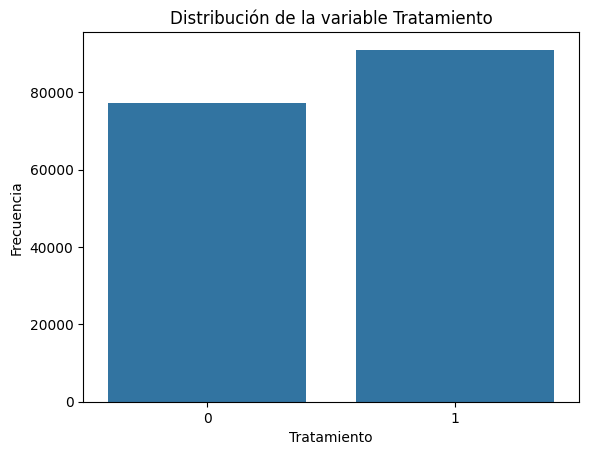

Porcentajes de cada categoría:
Tratamiento
1    54.118865
0    45.881135
Name: count, dtype: float64


In [ ]:
tratamiento_counts = df['Tratamiento'].value_counts()
print("Conteo de cada categoría:")
print(tratamiento_counts)

# Paso 2: Visualizar la distribución
sns.countplot(x='Tratamiento', data=df)
plt.title('Distribución de la variable Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Frecuencia')
plt.show()

# Paso 3: Calcular porcentajes
tratamiento_percentages = tratamiento_counts / len(df) * 100
print("Porcentajes de cada categoría:")
print(tratamiento_percentages)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Tratamiento'])
y = df['Tratamiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
#modelo 1
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#modelo 2
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#modelo 3
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "Random Forest": forest
}
metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Mostrar las métricas
for model_name, metric in metrics.items():
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {metric['Accuracy']:.4f}")
    print(f"Precision: {metric['Precision']:.4f}")
    print(f"Recall: {metric['Recall']:.4f}")
    print(f"F1 Score: {metric['F1 Score']:.4f}")
    print(f"ROC AUC: {metric['ROC AUC']:.4f}")
    print("\n")

Metrics for Logistic Regression:
Accuracy: 0.6741
Precision: 0.7069
Recall: 0.6781
F1 Score: 0.6922
ROC AUC: 0.7094


Metrics for Decision Tree:
Accuracy: 0.6565
Precision: 0.7063
Recall: 0.6236
F1 Score: 0.6624
ROC AUC: 0.6751


Metrics for Random Forest:
Accuracy: 0.6601
Precision: 0.7042
Recall: 0.6395
F1 Score: 0.6703
ROC AUC: 0.6768




Probamos con Random Forest

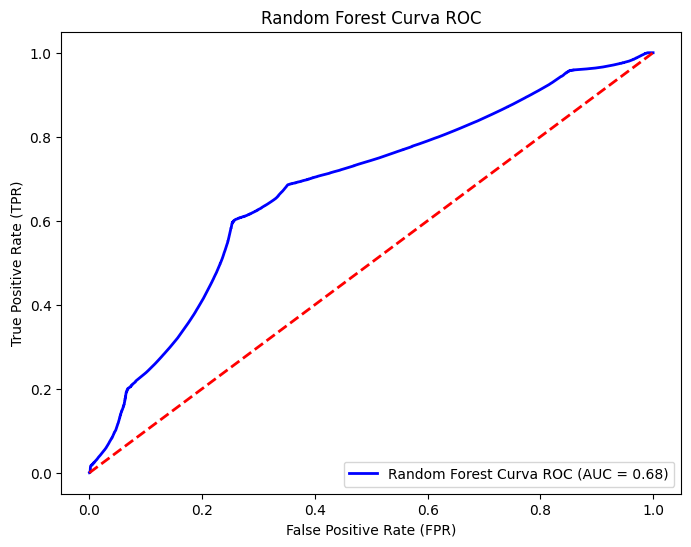

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#probabilidades predichas por el modelo Random Forest
y_probs_forest = forest.predict_proba(X_test)[:, 1]

#calcular la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_probs_forest)

#calcular el área bajo la curva ROC (ROC AUC)
roc_auc_forest = roc_auc_score(y_test, y_probs_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, color='blue', lw=2, label=f'Random Forest Curva ROC (AUC = {roc_auc_forest:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest Curva ROC')
plt.legend(loc='lower right')
plt.show()


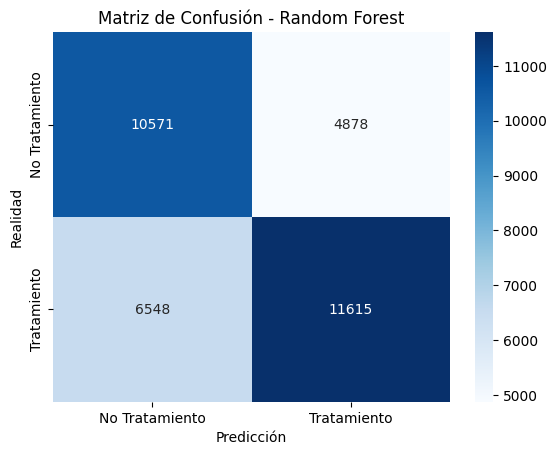

In [ ]:
from sklearn.metrics import confusion_matrix #matriz de confusion de random forest
y_pred_forest = forest.predict(X_test)
cm_forest = confusion_matrix(y_test, y_pred_forest)

sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tratamiento', 'Tratamiento'], yticklabels=['No Tratamiento', 'Tratamiento'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X_train, y_train, cv=3)

# Imprimir las puntuaciones y la media
print("Puntuaciones de cada fold:", scores)
print("Media de las puntuaciones:", np.mean(scores))

Puntuaciones de cada fold: [0.66955261 0.67006583 0.66909894]
Media de las puntuaciones: 0.6695724578745382


                       Feature  Importance
1           Historial_Familiar    0.637283
10  Entrevista_de_salud_mental    0.121168
12                   Masculino    0.054876
11                    Femenino    0.042010
2               Dias_sin_salir    0.020662
0                     Autónomo    0.018101
6             Cambios_de_humor    0.013992
9           Aislamiento_social    0.013582
4           Cambios_de_hábitos    0.013119
3             Estrés_creciente    0.013106


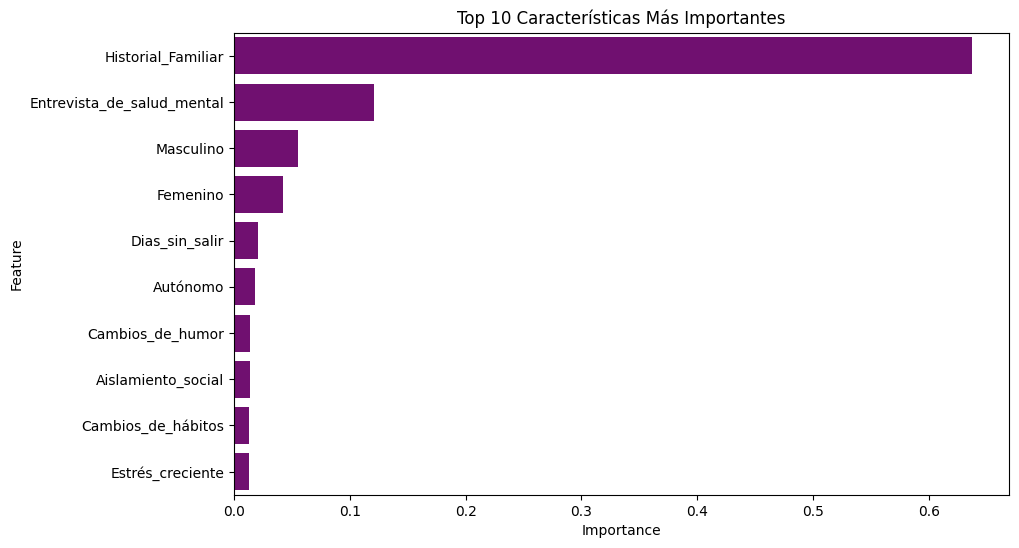

In [ ]:
importances = forest.feature_importances_
# Supongamos que tus características tienen nombres en una lista llamada feature_names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ['Feature_' + str(i) for i in range(X_train.shape[1])]

# Crear un DataFrame con características e importancias
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(10)
print(top_features)

# Generar colores aleatorios
colors = np.random.rand(10, 3)  # Generar 10 colores RGB aleatorios

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, color='Purple')
plt.title('Top 10 Características Más Importantes')
plt.show()

Probamos con Decision Tree


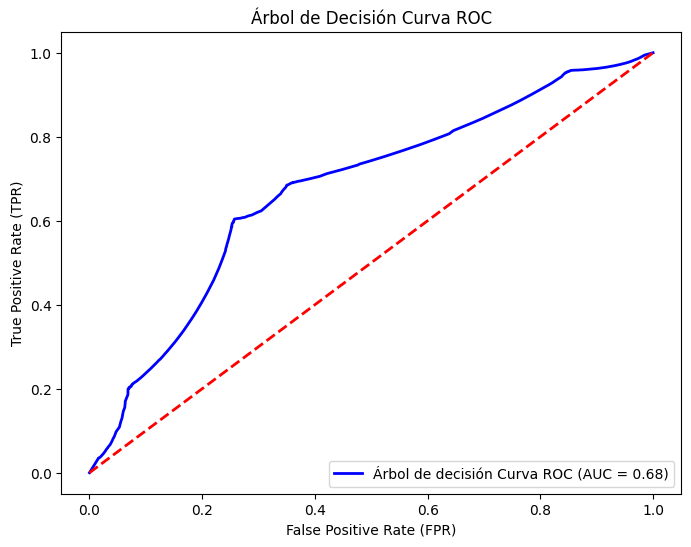

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#probabilidades predichas por el modelo Random Forest
y_probs_tree = tree.predict_proba(X_test)[:, 1]

#calcular la curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_probs_tree)

#calcular el área bajo la curva ROC (ROC AUC)
roc_auc_tree = roc_auc_score(y_test, y_probs_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label=f'Árbol de decisión Curva ROC (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Árbol de Decisión Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
scores = cross_val_score(tree, X_train, y_train, cv=5)

# Imprimir las puntuaciones y la media
print("Puntuaciones de cada fold:", scores)
print("Media de las puntuaciones:", np.mean(scores))

Puntuaciones de cada fold: [0.66562535 0.6643237  0.66465841 0.66335676 0.66442279]
Media de las puntuaciones: 0.6644774028248788


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = tree
param_dist = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

#obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [ ]:
print("Mejores hiperparámetros:", best_params)
print("Mejor modelo:", best_model)

Mejores hiperparámetros: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Mejor modelo: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)


In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.63      0.70      0.66     15449
           1       0.72      0.65      0.68     18163

    accuracy                           0.67     33612
   macro avg       0.67      0.67      0.67     33612
weighted avg       0.68      0.67      0.67     33612

ROC AUC: 0.674200407785188


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
print("AUC scores from cross-validation:", scores)
print("Mean AUC:", scores.mean())
print("Standard deviation of AUC:", scores.std())


AUC scores from cross-validation: [0.66558816 0.66424932 0.66480717 0.663208   0.66449717]
Mean AUC: 0.6644699653923423
Standard deviation of AUC: 0.0007753755116642072


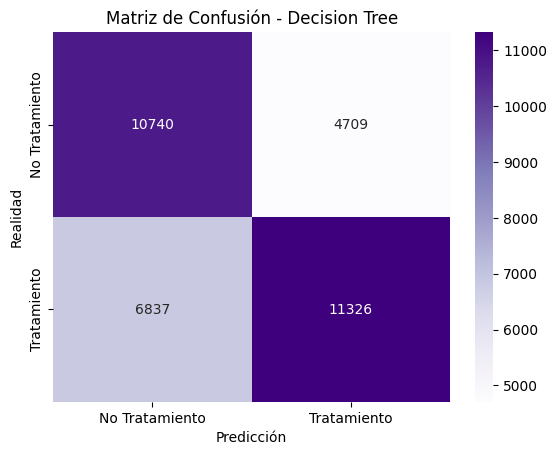

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Purples', xticklabels=['No Tratamiento', 'Tratamiento'], yticklabels=['No Tratamiento', 'Tratamiento'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Decision Tree')
plt.show()

                       Feature  Importance
1           Historial_Familiar    0.763165
10  Entrevista_de_salud_mental    0.083928
11                    Femenino    0.055451
12                   Masculino    0.051670
0                     Autónomo    0.011058
2               Dias_sin_salir    0.005640
6             Cambios_de_humor    0.003865
3             Estrés_creciente    0.003658
4           Cambios_de_hábitos    0.003619
8              Interés_laboral    0.003365


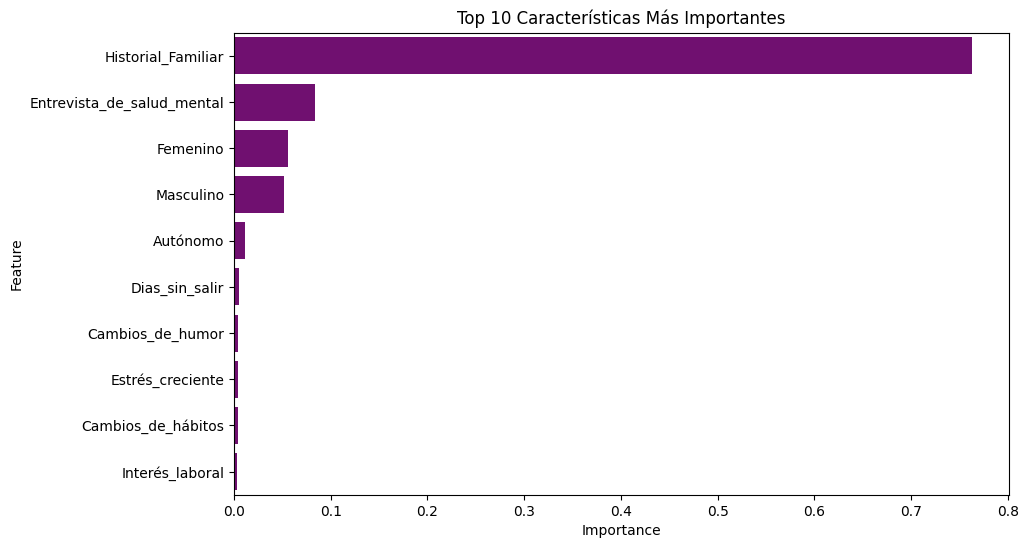

In [ ]:
importances = tree.feature_importances_
# Supongamos que tus características tienen nombres en una lista llamada feature_names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ['Feature_' + str(i) for i in range(X_train.shape[1])]

# Crear un DataFrame con características e importancias
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(10)
print(top_features)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, color = 'Purple')
plt.title('Top 10 Características Más Importantes')
plt.show()

Probamos con Logistic Regression

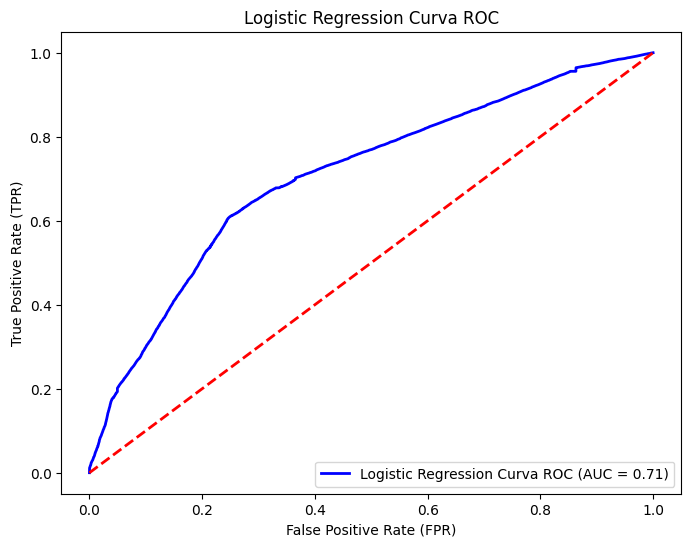

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#probabilidades predichas por el modelo Logistic Regression
y_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]

#calcular la curva ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_probs_log_reg)

#calcular el área bajo la curva ROC (ROC AUC)
roc_auc_log_reg = roc_auc_score(y_test, y_probs_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression Curva ROC (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')
print("AUC scores from cross-validation:", scores)
print("Mean AUC:", scores.mean())
print("Standard deviation of AUC:", scores.std())

AUC scores from cross-validation: [0.6793038  0.67885753 0.68007765]
Mean AUC: 0.6794129947387728
Standard deviation of AUC: 0.0005040638339802234
